<a href="https://colab.research.google.com/github/Pratzybha/LUNG_CLASSIFIER_CNN/blob/main/CNN_LUNG_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "pratibhabalgi"
os.environ['KAGGLE_KEY'] = "5653a67e9f7e4d92b1a3c6f2d689ba6f"

In [2]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database --force 

100% 778M/778M [00:33<00:00, 27.6MB/s]
100% 778M/778M [00:33<00:00, 24.1MB/s]


In [3]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [4]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [5]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

In [6]:
import cv2

In [7]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png')

In [8]:
import matplotlib.pyplot as plt

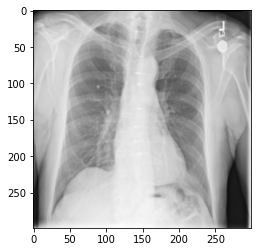

In [9]:
plt.imshow(img)

In [11]:
img.shape

(299, 299, 3)

In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [14]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [15]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [16]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]


In [17]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-1768.png'

In [18]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [19]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [20]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [21]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normalUrl = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normalUrl, 0)

In [22]:
len(normalUrl), len(normalImages)

(10192, 10192)

In [23]:
covidImages = np.asarray(covidImages)
normalImages = np.asarray(normalImages)

In [24]:
covidImages.shape

(3616, 100, 100, 3)

In [25]:
normalImages.shape

(10192, 100, 100, 3)

In [26]:
data = np.r_[covidImages, normalImages]

In [27]:
data.shape

(13808, 100, 100, 3)

In [28]:
targets = np.r_[covidTargets, normalTargets]

In [29]:
targets.shape

(13808,)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)


In [32]:
import tensorflow as tf

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [34]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [36]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
324/324 [==============================] - 118s 362ms/step - loss: 0.9730 - accuracy: 0.8187 - val_loss: 0.3407 - val_accuracy: 0.8497
Epoch 2/5
324/324 [==============================] - 118s 363ms/step - loss: 0.2768 - accuracy: 0.8812 - val_loss: 0.2661 - val_accuracy: 0.8896
Epoch 3/5
324/324 [==============================] - 117s 361ms/step - loss: 0.2101 - accuracy: 0.9134 - val_loss: 0.2267 - val_accuracy: 0.9076
Epoch 4/5
324/324 [==============================] - 116s 359ms/step - loss: 0.1889 - accuracy: 0.9221 - val_loss: 0.2226 - val_accuracy: 0.9128
Epoch 5/5
324/324 [==============================] - 121s 373ms/step - loss: 0.1688 - accuracy: 0.9316 - val_loss: 0.2133 - val_accuracy: 0.9209


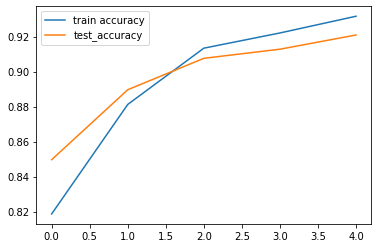

In [38]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()


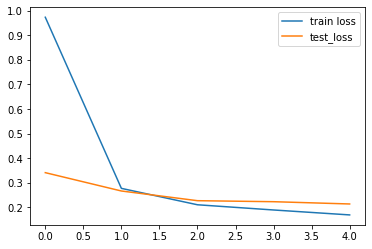

In [39]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()
